In [ ]:
import pandas as pd

# Đọc file excel
file_path = '/content/Online Retail.xlsx'
df = pd.read_excel(file_path)

# Kiểm tra số lượng hàng và cột
print("Shape of the DataFrame:", df.shape)

# Kiểu dữ liệu
print("\nData types of columns:")
print(df.dtypes)

# Hiển thị 5 dòng đầu tiên
print("\nFirst 5 rows of the DataFrame:")
display(df.head())

# thống kê mô tả
print("\nDescriptive statistics of the DataFrame:")
display(df.describe())

Shape of the DataFrame: (541909, 8)

Data types of columns:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

First 5 rows of the DataFrame:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



Descriptive statistics of the DataFrame:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Làm sạch dữ liệu (Data Cleaning)

In [ ]:
# Xóa giá trị thiếu (dropna())
df.dropna(inplace=True)

# Loại bỏ hóa đơn bị hủy (InvoiceNo bắt đầu bằng “C”)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Loại bỏ giá trị âm hoặc bằng 0 ở Quantity, UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Chuyển đổi InvoiceDate sang dạng datetime (đã được thực hiện khi đọc file Excel)
# df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # This step is not needed as the column is already datetime64[ns]

# Chuẩn hóa CustomerID thành str
df['CustomerID'] = df['CustomerID'].astype(str)

print("Shape of the DataFrame after cleaning:", df.shape)
print("\nData types of columns after cleaning:")
print(df.dtypes)
print("\nFirst 5 rows of the DataFrame after cleaning:")
display(df.head())

Shape of the DataFrame after cleaning: (397884, 8)

Data types of columns after cleaning:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

First 5 rows of the DataFrame after cleaning:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##3. Tạo biến mới & Chuẩn bị phân tích

In [ ]:
# Tạo TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Tách ngày, tháng, năm từ InvoiceDate
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day

# Gán quốc gia (Country) thành nhóm (UK vs non-UK)
df['CountryGroup'] = df['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'non-UK')

# Xây dựng InvoiceYearMonth để phân tích theo tháng
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')

print("\nDataFrame after adding new columns:")
display(df.head())
print("\nData types of columns after adding new columns:")
print(df.dtypes)


DataFrame after adding new columns:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,CountryGroup,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,UK,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,UK,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,UK,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,UK,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,UK,2010-12



Data types of columns after adding new columns:
InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                  object
Country                     object
TotalPrice                 float64
InvoiceYear                  int32
InvoiceMonth                 int32
InvoiceDay                   int32
CountryGroup                object
InvoiceYearMonth         period[M]
dtype: object


## 4. Phân tích mô tả

# Task
Phân tích dữ liệu bán hàng được cung cấp để tính tổng doanh thu, doanh thu theo quốc gia, xác định 10 sản phẩm bán chạy nhất, phân tích xu hướng doanh thu hàng tháng và hình dung sự phân bổ giá đơn vị

In [ ]:
# Tính toán và hiển thị tổng doanh thu bằng cách cộng cột 'TotalPrice'.
total_revenue = df['TotalPrice'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $8,911,407.90


In [ ]:
# Tính toán và hiển thị tổng doanh thu của từng quốc gia.
revenue_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
display(revenue_by_country)

,TotalPrice
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


In [ ]:
# Xác định và hiển thị 10 sản phẩm bán chạy nhất dựa trên số lượng bán ra.
top_10_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
display(top_10_products)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725
ASSORTED COLOUR BIRD ORNAMENT,35362
PACK OF 72 RETROSPOT CAKE CASES,33693
POPCORN HOLDER,30931
RABBIT NIGHT LIGHT,27202


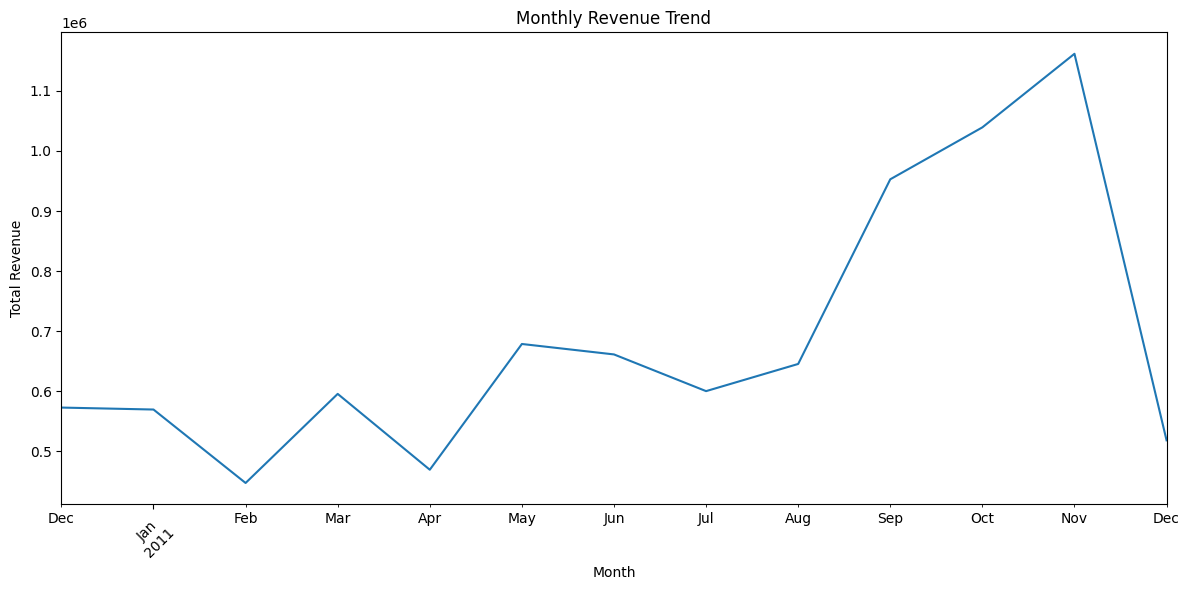

In [ ]:
#
import matplotlib.pyplot as plt

monthly_revenue = df.groupby('InvoiceYearMonth')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

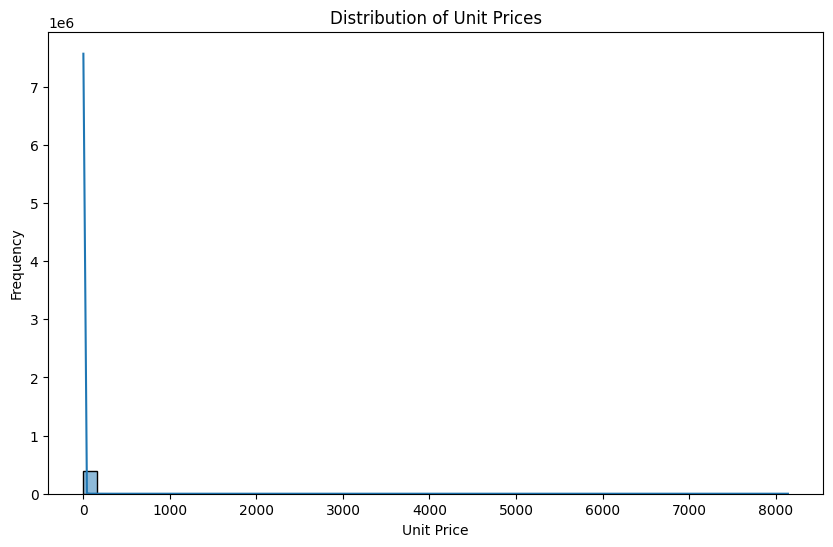

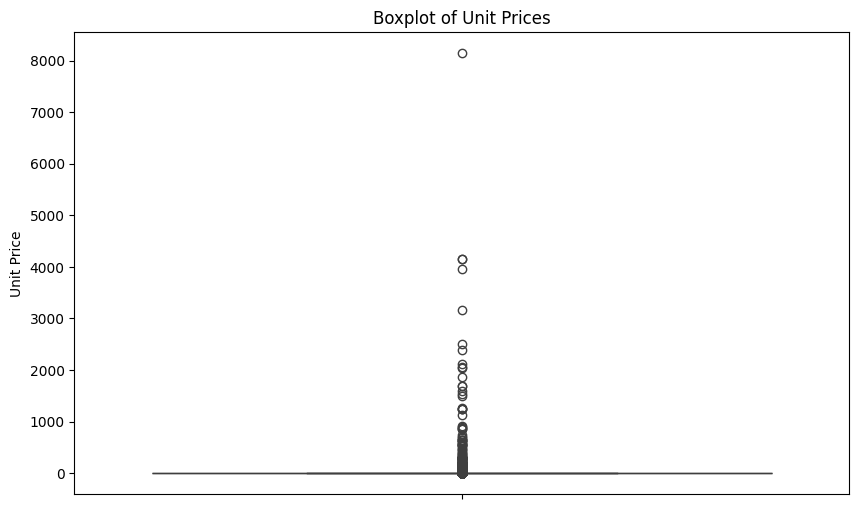

In [ ]:
# phân phối giá đơn vị bằng biểu đồ hình cột và biểu đồ hộp.
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the 'UnitPrice' column
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

# Create a boxplot of the 'UnitPrice' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['UnitPrice'])
plt.title('Boxplot of Unit Prices')
plt.ylabel('Unit Price')
plt.show()

## 5. Phân tích khách hàng (Customer Insights)

# Task
Phân tích hành vi của khách hàng bằng cách đếm số lượng khách hàng duy nhất, tính tổng số đơn hàng và doanh thu trung bình trên mỗi khách hàng, đồng thời xác định tỷ lệ khách hàng quay lại.

## Đếm số lượng khách hàng duy nhất



In [ ]:
# Tính toán và hiển thị tổng số khách hàng duy nhất.
unique_customers_count = df['CustomerID'].nunique()
print(f"Total number of unique customers: {unique_customers_count}")

Total number of unique customers: 4338


## Tính tổng số đơn hàng cho mỗi khách hàng




**Reasoning**:
Group the dataframe by 'CustomerID', count the number of unique 'InvoiceNo' for each customer, and display the result.



In [ ]:
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
display(orders_per_customer.head())

,InvoiceNo
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1


## Tính doanh thu trung bình trên mỗi khách hàng



**Reasoning**:
Calculate the total revenue per customer, divide by the number of unique invoices per customer to get the average revenue per order, and display the head.



In [ ]:
average_revenue_per_customer = df.groupby('CustomerID')['TotalPrice'].sum() / df.groupby('CustomerID')['InvoiceNo'].nunique()
display(average_revenue_per_customer.head())

,0
CustomerID,
12346.0,77183.600000
12347.0,615.714286
12348.0,449.310000
12349.0,1757.550000
12350.0,334.400000


## Calculate repeat customer rate

### Subtask:
Determine the percentage of customers who have placed more than one order.


**Reasoning**:
Calculate the repeat customer rate by counting customers with more than one order and dividing by the total unique customer count.



In [ ]:
repeat_customers_count = orders_per_customer[orders_per_customer > 1].count()
repeat_customer_rate = (repeat_customers_count / unique_customers_count) * 100
print(f"Repeat Customer Rate: {repeat_customer_rate:.2f}%")

Repeat Customer Rate: 65.58%


## Present findings

### Subtask:
Summarize the key customer metrics: total unique customers, total orders per customer, average revenue per customer, and repeat customer rate.


**Reasoning**:
Print the previously calculated customer metrics and display the heads of the relevant series.



In [ ]:
print(f"Total number of unique customers: {unique_customers_count}")
print(f"Repeat Customer Rate: {repeat_customer_rate:.2f}%")
print("\nTotal orders per customer (head):")
display(orders_per_customer.head())
print("\nAverage revenue per customer (head):")
display(average_revenue_per_customer.head())

print("\nSummary of key customer metrics:")
print(f"- There are {unique_customers_count} unique customers.")
print(f"- The repeat customer rate is {repeat_customer_rate:.2f}%, indicating a significant portion of customers return to make additional purchases.")
print("- The 'Total orders per customer' and 'Average revenue per customer' show variations in purchasing behavior and value among the customer base.")

Total number of unique customers: 4338
Repeat Customer Rate: 65.58%

Total orders per customer (head):


,InvoiceNo
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1



Average revenue per customer (head):


,0
CustomerID,
12346.0,77183.600000
12347.0,615.714286
12348.0,449.310000
12349.0,1757.550000
12350.0,334.400000



Summary of key customer metrics:
- There are 4338 unique customers.
- The repeat customer rate is 65.58%, indicating a significant portion of customers return to make additional purchases.
- The 'Total orders per customer' and 'Average revenue per customer' show variations in purchasing behavior and value among the customer base.


## Summary:

### Data Analysis Key Findings

*   There are 4338 unique customers in the dataset.
*   The repeat customer rate is 65.58%, indicating that a significant portion of customers placed more than one order.
*   The analysis of "Total orders per customer" and "Average revenue per customer" revealed variability in purchasing frequency and spending among customers.

### Insights or Next Steps

*   The high repeat customer rate suggests a strong customer base; consider strategies to further engage and retain these valuable customers.
*   Investigate the distribution of "Total orders per customer" and "Average revenue per customer" to segment customers based on their purchasing behavior and tailor marketing efforts accordingly.


## 6. Phân tích RFM (Recency – Frequency – Monetary)

In [ ]:
# Tìm InvoiceDate lớn nhất trong toàn bộ tập dữ liệu
latest_date = df['InvoiceDate'].max()

# Tính toán mức độ gần đây của từng khách hàng
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (latest_date - recency_df['InvoiceDate']).dt.days

# Lưu trữ các giá trị gần đây đã tính toán trong một DataFrame mới
recency_df = recency_df[['CustomerID', 'Recency']]
recency_df.set_index('CustomerID', inplace=True)

display(recency_df.head())

,Recency
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309


## Calculate frequency

### Subtask:
Count the total number of unique orders for each customer.


**Reasoning**:
Calculate the number of unique orders for each customer and display the head of the resulting Series.



In [ ]:
# Đếm tổng số đơn hàng duy nhất của mỗi khách hàng.
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique()
display(frequency_df.head())

,InvoiceNo
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [ ]:
# Tính tổng doanh thu tạo ra bởi mỗi khách hàng.
monetary_df = df.groupby('CustomerID')['TotalPrice'].sum()
display(monetary_df.head())

,TotalPrice
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [ ]:
# Tạo một DataFrame mới chứa các giá trị Gần đây, Tần suất và Tiền tệ cho mỗi khách hàng.
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']
display(rfm_df.head())

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


**Reasoning**:
Assign RFM scores to customers based on quantiles and create segments.



In [ ]:

# Assign R, F, and M scores
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])

# For Frequency, determine the number of unique bin edges first
num_freq_bins = pd.qcut(rfm_df['Frequency'], 5, duplicates='drop').nunique()
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], num_freq_bins, labels=False, duplicates='drop') + 1 # Assign labels dynamically

rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores
rfm_df['RFM_score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

# Define RFM segments (example segmentation)
def rfm_segment(row):
    if row['RFM_score'] == '555':
        return 'Best Customers'
    elif row['M_score'] == 5:
        return 'High Value'
    elif row['F_score'] == 5:
        return 'Frequent Buyers'
    elif row['R_score'] == 5:
        return 'New Customers'
    elif row['R_score'] == 1:
        return 'Churned Customers'
    else:
        return 'Others'

rfm_df['RFM_segment'] = rfm_df.apply(rfm_segment, axis=1)

# Display the head of the dataframe with new columns
display(rfm_df.head())

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,High Value
12347.0,1,7,4310.00,5,3,5,535,High Value
12348.0,74,4,1797.24,2,2,4,224,Others
12349.0,18,1,1757.55,4,1,4,414,Others
12350.0,309,1,334.40,1,1,2,112,Churned Customers


/tmp/ipython-input-2238864499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_heatmap_data = rfm_df.groupby(['R_score', 'F_score']).size().unstack().fillna(0)


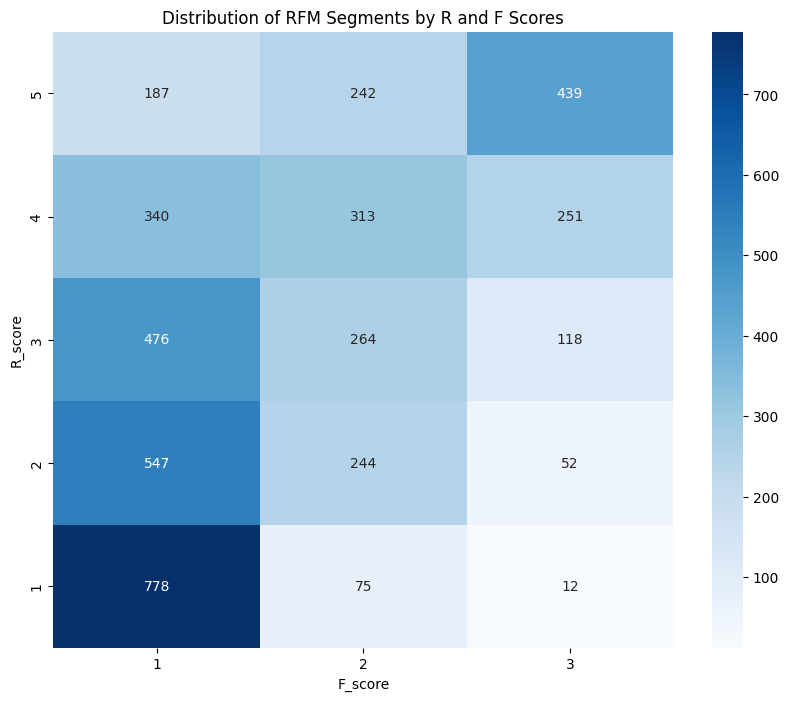

In [ ]:
# bản đồ nhiệt để trực quan hóa sự phân bố của các phân đoạn RFM dựa trên điểm R và F.
rfm_heatmap_data = rfm_df.groupby(['R_score', 'F_score']).size().unstack().fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(rfm_heatmap_data, annot=True, fmt='g', cmap='Blues')
plt.title('Distribution of RFM Segments by R and F Scores')
plt.xlabel('F_score')
plt.ylabel('R_score')
plt.show()

In [ ]:
print("Summary of RFM Analysis:\n")

print("RFM Segments and Descriptions:")
print("- Best Customers (RFM_score '555'): Customers who have purchased recently, frequently, and spent the most.")
print("- High Value (M_score 5): Customers who have spent the most, regardless of recency or frequency.")
print("- Frequent Buyers (F_score 5): Customers who have purchased most frequently, regardless of recency or monetary value.")
print("- New Customers (R_score 5): Customers who have purchased most recently.")
print("- Churned Customers (R_score 1): Customers who have not purchased for a long time.")
print("- Others: Customers who do not fall into the above specific segments.")

print("\nDistribution of Customers Across Segments:")
segment_counts = rfm_df['RFM_segment'].value_counts()
display(segment_counts)

print("\nInsights and Potential Strategies:")
print(f"- The analysis identified {len(rfm_df)} unique customers.")
print(f"- The distribution of customers across segments (shown above) highlights the proportion of customers in each group.")
print("- 'Best Customers' and 'High Value' segments are likely the most valuable and should be targeted for retention and loyalty programs.")
print("- 'New Customers' represent an opportunity for engagement to encourage repeat purchases.")
print("- 'Churned Customers' require win-back strategies.")
print("- The 'Others' segment can be further analyzed to identify potential sub-segments.")

Summary of RFM Analysis:

RFM Segments and Descriptions:
- Best Customers (RFM_score '555'): Customers who have purchased recently, frequently, and spent the most.
- High Value (M_score 5): Customers who have spent the most, regardless of recency or frequency.
- Frequent Buyers (F_score 5): Customers who have purchased most frequently, regardless of recency or monetary value.
- New Customers (R_score 5): Customers who have purchased most recently.
- Churned Customers (R_score 1): Customers who have not purchased for a long time.
- Others: Customers who do not fall into the above specific segments.

Distribution of Customers Across Segments:


,count
RFM_segment,
Others,2154
High Value,868
Churned Customers,844
New Customers,472



Insights and Potential Strategies:
- The analysis identified 4338 unique customers.
- The distribution of customers across segments (shown above) highlights the proportion of customers in each group.
- 'Best Customers' and 'High Value' segments are likely the most valuable and should be targeted for retention and loyalty programs.
- 'New Customers' represent an opportunity for engagement to encourage repeat purchases.
- 'Churned Customers' require win-back strategies.
- The 'Others' segment can be further analyzed to identify potential sub-segments.


## Summary:

### Data Analysis Key Findings

*   Recency was calculated as the number of days since each customer's last purchase.
*   Frequency was calculated as the total number of unique orders for each customer.
*   Monetary value was calculated as the total revenue generated by each customer.
*   Recency, Frequency, and Monetary values were combined into a single DataFrame for each customer.
*   RFM scores (R, F, and M) were assigned to customers based on quantiles of their respective Recency, Frequency, and Monetary values.
*   Customer segments were defined based on the assigned RFM scores, including 'Best Customers', 'High Value', 'Frequent Buyers', 'New Customers', 'Churned Customers', and 'Others'.
*   A heatmap visualization was created to show the distribution of customers across different combinations of Recency and Frequency scores.
*   The distribution of customers across the defined RFM segments was analyzed and displayed.

### Insights or Next Steps

*   Focus on retaining and engaging 'Best Customers' and 'High Value' segments through targeted loyalty programs and exclusive offers.
*   Implement win-back strategies for 'Churned Customers' and engagement initiatives for 'New Customers' to encourage repeat purchases.


# Task
Analyze the provided sales data to identify outliers in 'UnitPrice', 'Quantity', and 'TotalPrice' using the IQR method and visualize them using boxplots and scatter plots.

## 7. Phát hiện bất thường & kiểm tra chất lượng dữ liệu

## Xác định các giá trị ngoại lai bằng iqr



In [ ]:
# Calculate Q1 and Q3 for UnitPrice, Quantity, and TotalPrice
Q1 = df[['UnitPrice', 'Quantity', 'TotalPrice']].quantile(0.25)
Q3 = df[['UnitPrice', 'Quantity', 'TotalPrice']].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_unitprice = df[(df['UnitPrice'] < lower_bound['UnitPrice']) | (df['UnitPrice'] > upper_bound['UnitPrice'])]
outliers_quantity = df[(df['Quantity'] < lower_bound['Quantity']) | (df['Quantity'] > upper_bound['Quantity'])]
outliers_totalprice = df[(df['TotalPrice'] < lower_bound['TotalPrice']) | (df['TotalPrice'] > upper_bound['TotalPrice'])]

# Print the number and percentage of outliers
print(f"Number of outliers in UnitPrice: {len(outliers_unitprice)}")
print(f"Percentage of outliers in UnitPrice: {len(outliers_unitprice) / len(df) * 100:.2f}%")

print(f"\nNumber of outliers in Quantity: {len(outliers_quantity)}")
print(f"Percentage of outliers in Quantity: {len(outliers_quantity) / len(df) * 100:.2f}%")

print(f"\nNumber of outliers in TotalPrice: {len(outliers_totalprice)}")
print(f"Percentage of outliers in TotalPrice: {len(outliers_totalprice) / len(df) * 100:.2f}%")

Number of outliers in UnitPrice: 34356
Percentage of outliers in UnitPrice: 8.63%

Number of outliers in Quantity: 25647
Percentage of outliers in Quantity: 6.45%

Number of outliers in TotalPrice: 31241
Percentage of outliers in TotalPrice: 7.85%


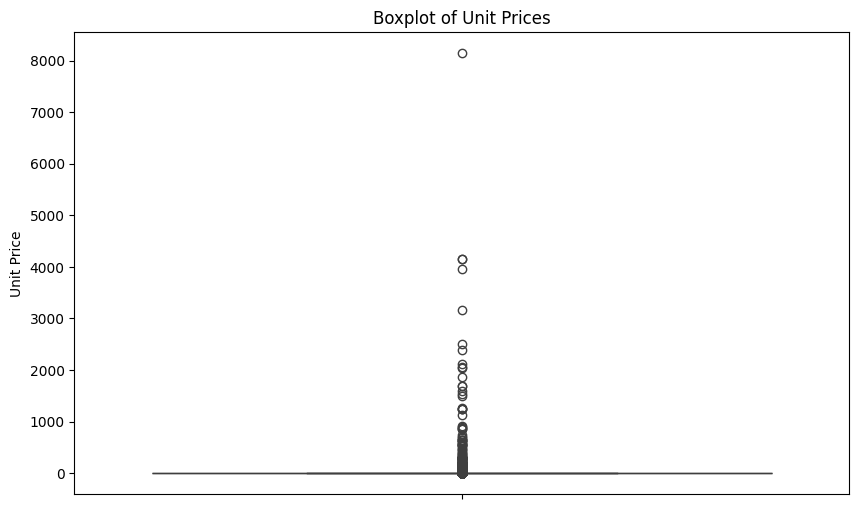

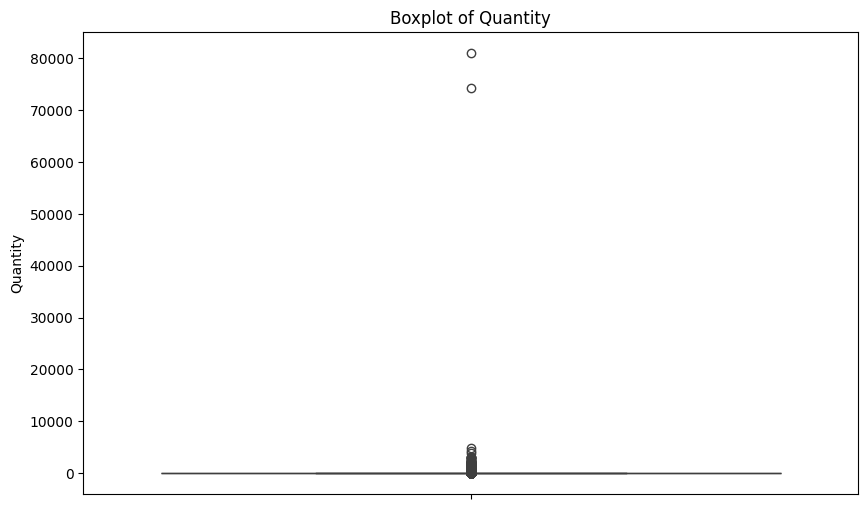

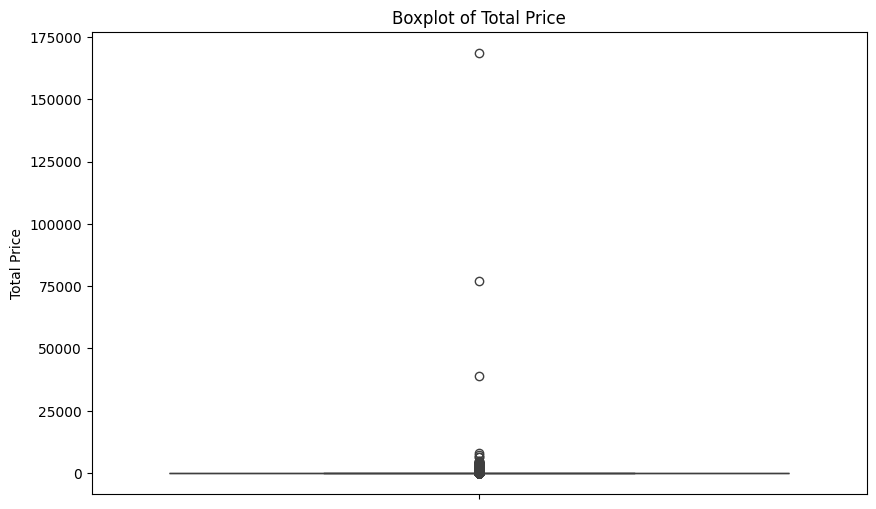

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo biểu đồ hộp cho cột 'UnitPrice'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['UnitPrice'])
plt.title('Boxplot of Unit Prices')
plt.ylabel('Unit Price')
plt.show()

# Tạo biểu đồ hộp cho cột 'Số lượng'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')
plt.show()

# Tạo biểu đồ hộp cho cột 'TotalPrice'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['TotalPrice'])
plt.title('Boxplot of Total Price')
plt.ylabel('Total Price')
plt.show()

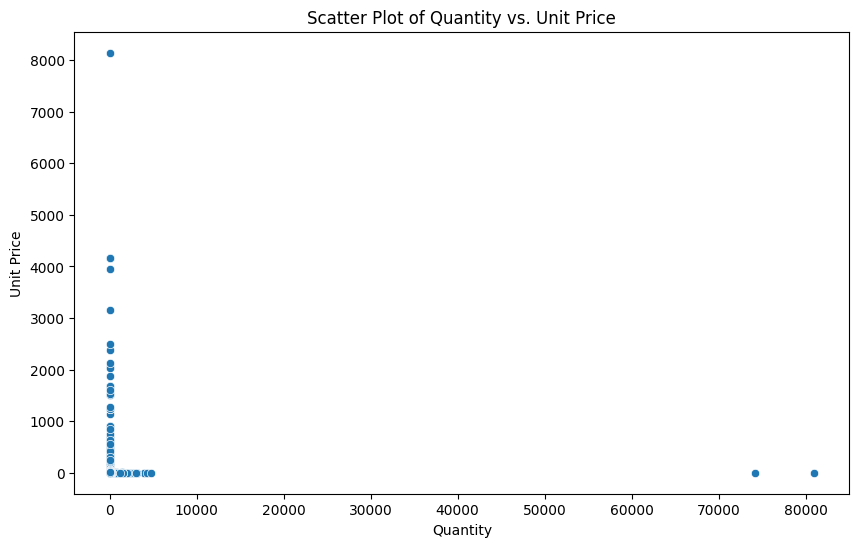

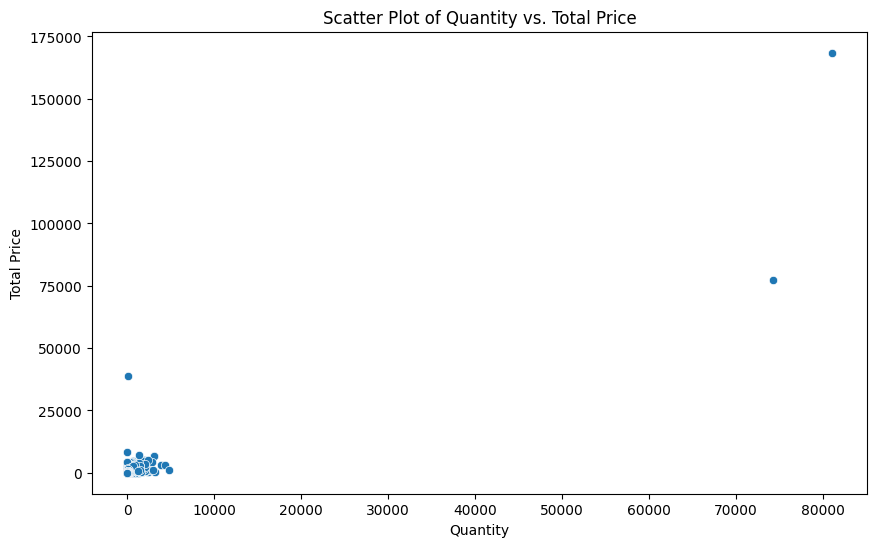

In [ ]:
# Tạo biểu đồ phân tán của Quantity vs. UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Scatter Plot of Quantity vs. Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

# Tạo biểu đồ phân tán Quantity vs. TotalPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalPrice', data=df)
plt.title('Scatter Plot of Quantity vs. Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

## Summary:

### Data Analysis Key Findings
*   The IQR method identified outliers in 'UnitPrice' (8.63%, 34356 records), 'Quantity' (6.45%, 25647 records), and 'TotalPrice' (7.85%, 31241 records).
*   Boxplots for 'UnitPrice', 'Quantity', and 'TotalPrice' visually confirmed the presence of numerous outliers extending far beyond the whiskers.
*   Scatter plots of 'Quantity' vs. 'UnitPrice' and 'Quantity' vs. 'TotalPrice' showed data points that are distant from the main clusters, indicating potential outliers or unusual sales transactions.

### Insights or Next Steps
*   Further investigation into the identified outliers is needed to understand their nature and potential impact on analysis.
*   Consider applying outlier treatment methods, such as removal, transformation, or capping, depending on the context and goals of subsequent analysis.


##  8.Trực quan hóa (Visualization)

# Task
Visualize the data using bar charts for top products and countries, a time series plot for monthly revenue, a pie chart for country distribution, a heatmap for the RFM matrix, and a pairplot for variable relationships.

## Bar chart for top products

### Subtask:
Create a bar chart to display the top 10 best-selling products.


**Reasoning**:
Create a bar chart of the top 10 best-selling products with appropriate labels and title.



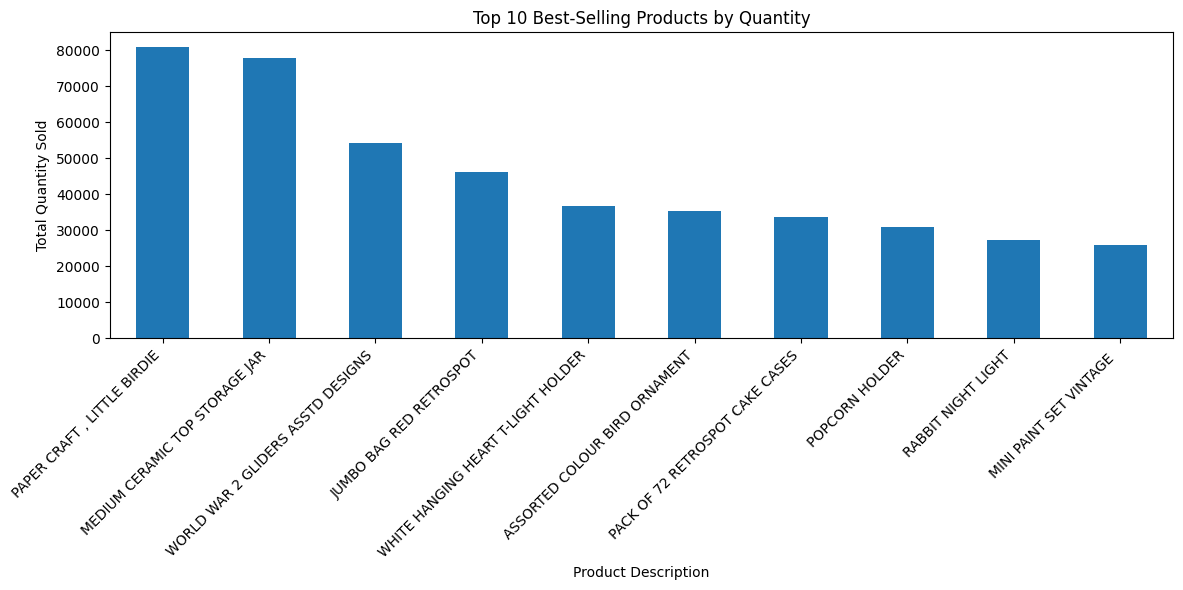

In [ ]:
 # biểu đồ thanh để hiển thị 10 sản phẩm bán chạy nhất.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

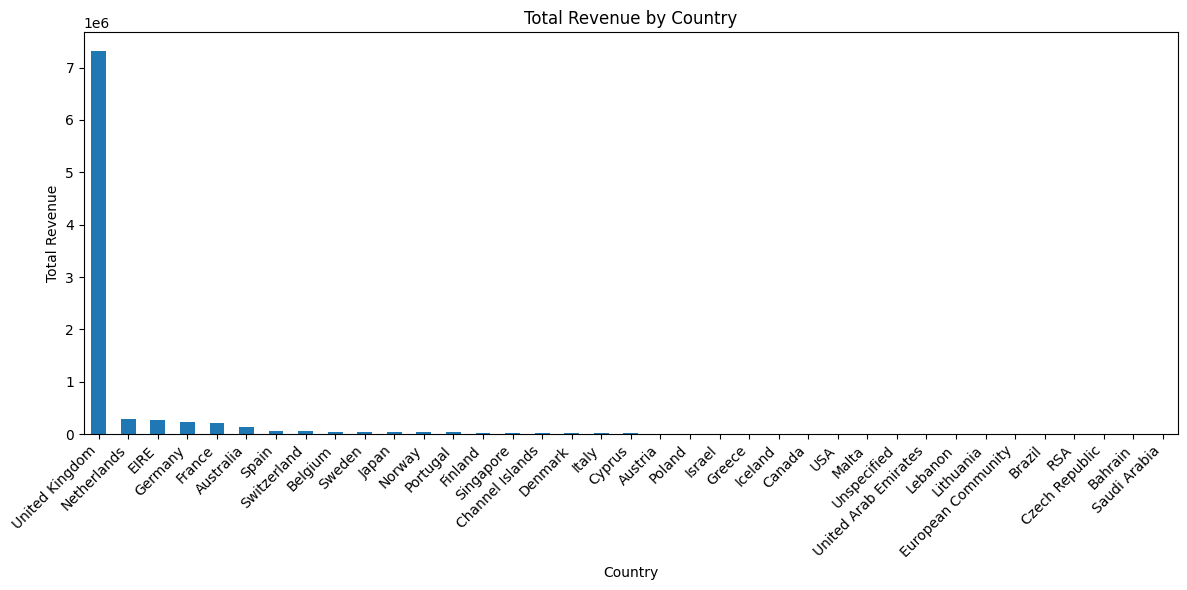

In [ ]:
# Biểu đồ thanh cho các quốc gia hàng đầu
plt.figure(figsize=(12, 6))
revenue_by_country.plot(kind='bar')
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

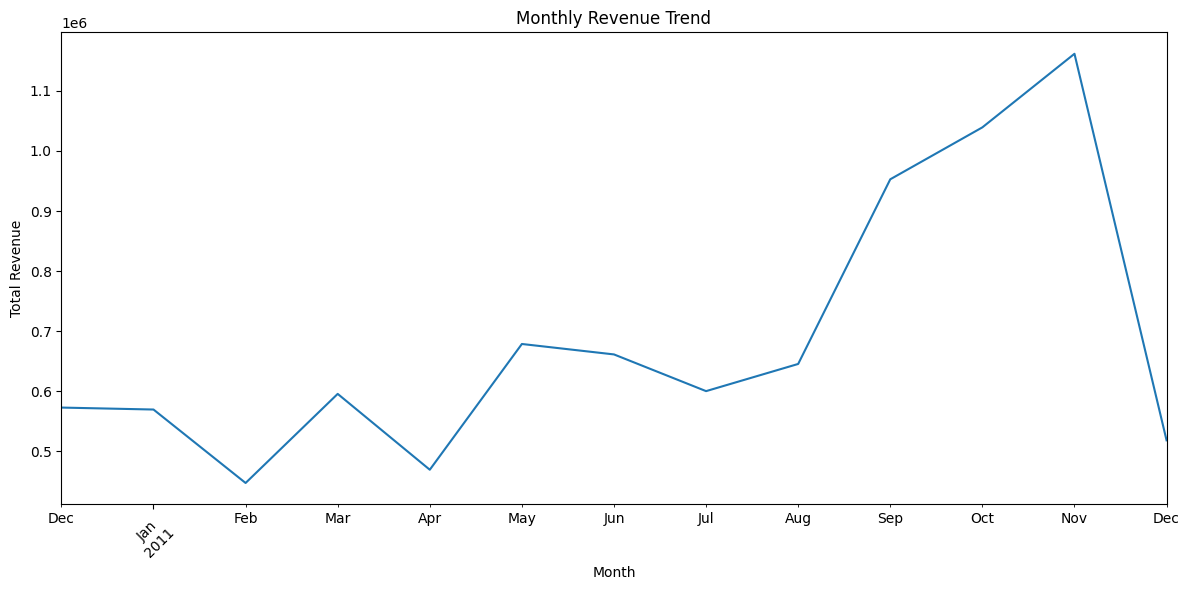

In [ ]:
# Biểu đồ chuỗi thời gian thể hiện xu hướng tổng doanh thu qua nhiều tháng.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

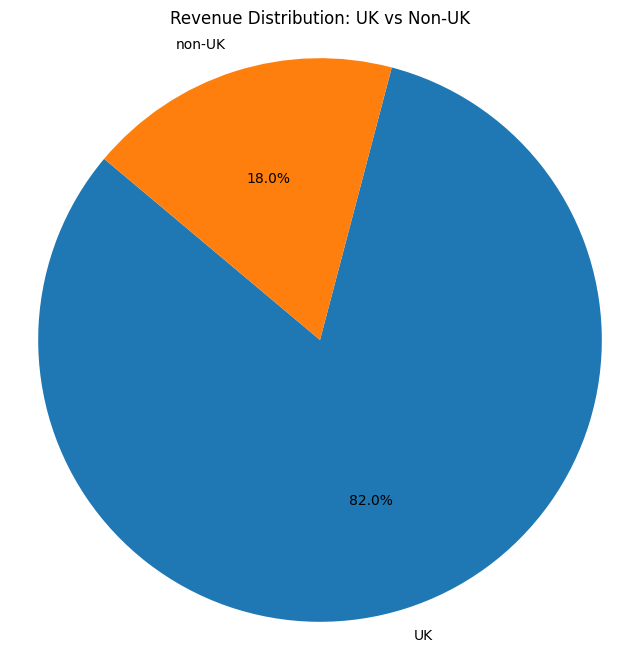

In [ ]:
# Tính tổng doanh thu cho nhóm quốc gia 'Vương quốc Anh' và 'ngoài Vương quốc Anh' và tạo biểu đồ hình tròn để visualai tỷ lệ
import matplotlib.pyplot as plt

revenue_by_country_group = df.groupby('CountryGroup')['TotalPrice'].sum()

plt.figure(figsize=(8, 8))
plt.pie(revenue_by_country_group, labels=revenue_by_country_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution: UK vs Non-UK')
plt.axis('equal')

## Pairplot for variable relationships

### Subtask:
Pairplot for variable relationships


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[['Quantity', 'UnitPrice', 'TotalPrice']])
plt.suptitle('Pairwise Relationships of Numerical Variables', y=1.02)
plt.show()